In [108]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [109]:
xl = pd.ExcelFile('/Users/spencerfogelman/Downloads/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

In [110]:
nycrime = xl.parse('13tbl8ny', skiprows=4)

In [111]:
nycrime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [112]:
nycrime.isnull().count()

City                                      351
Population                                351
Violent\ncrime                            351
Murder and\nnonnegligent\nmanslaughter    351
Rape\n(revised\ndefinition)1              351
Rape\n(legacy\ndefinition)2               351
Robbery                                   351
Aggravated\nassault                       351
Property\ncrime                           351
Burglary                                  351
Larceny-\ntheft                           351
Motor\nvehicle\ntheft                     351
Arson3                                    351
dtype: int64

In [113]:
nycrime.isnull().mean()

City                                     0.000
Population                               0.009
Violent\ncrime                           0.009
Murder and\nnonnegligent\nmanslaughter   0.009
Rape\n(revised\ndefinition)1             1.000
Rape\n(legacy\ndefinition)2              0.009
Robbery                                  0.009
Aggravated\nassault                      0.009
Property\ncrime                          0.009
Burglary                                 0.009
Larceny-\ntheft                          0.009
Motor\nvehicle\ntheft                    0.009
Arson3                                   0.467
dtype: float64

In [114]:
nycrime.drop(labels=['Rape\n(revised\ndefinition)1', 'Arson3'], axis=1, inplace = True)

In [115]:
nycrime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000
3,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000
4,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000


In [116]:
cols = nycrime.columns.tolist()
cols.remove('Property\ncrime')

In [117]:
cols.remove('City')

In [118]:
for col in cols:
    median = nycrime[col].median()
    nycrime.fillna(median, inplace=True)

In [125]:
nycrime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000
3,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000
4,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000


In [129]:
nycrime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft'],
      dtype='object')

In [132]:
outlier = nycrime[nycrime['Violent\ncrime'] > 50000]
nycrime.drop(outlier.index, axis=0 , inplace = True)

In [134]:
outlier = nycrime[nycrime['Violent\ncrime'] > 7000]
nycrime.drop(outlier.index, axis=0 , inplace = True)

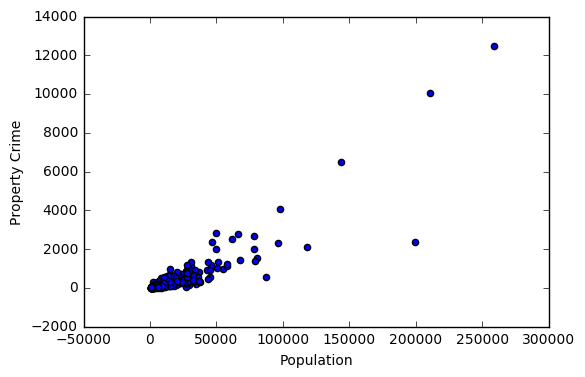

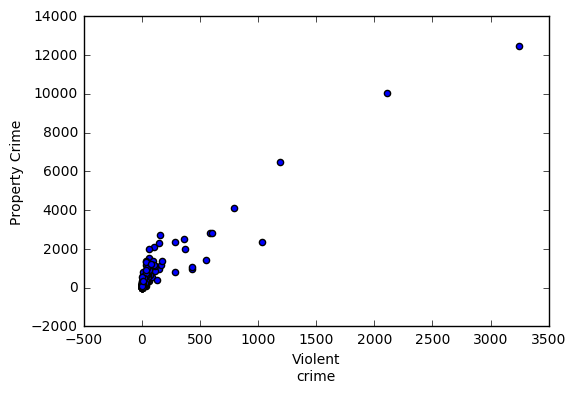

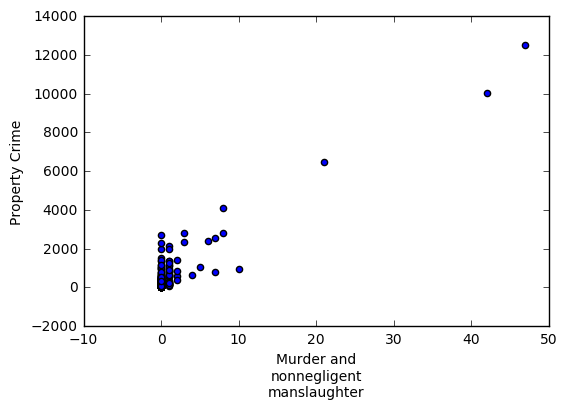

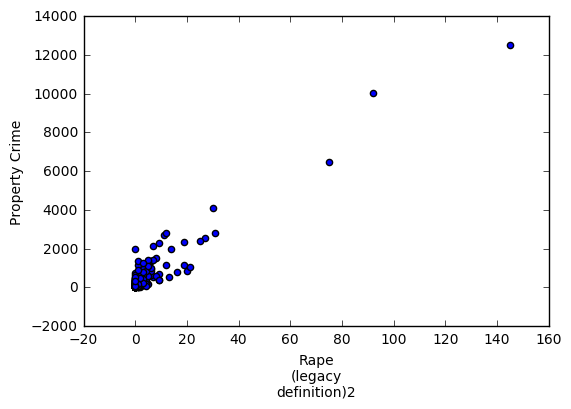

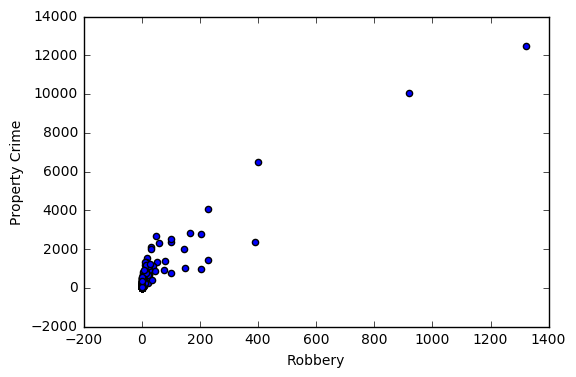

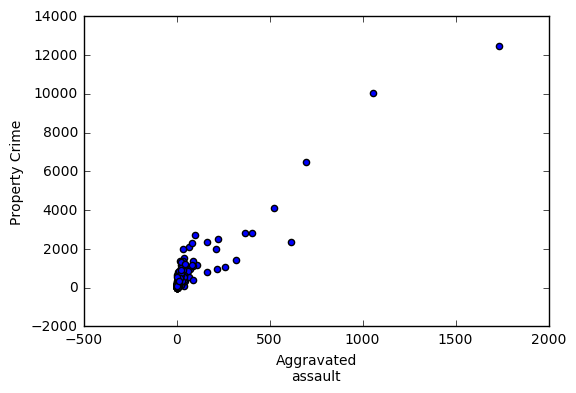

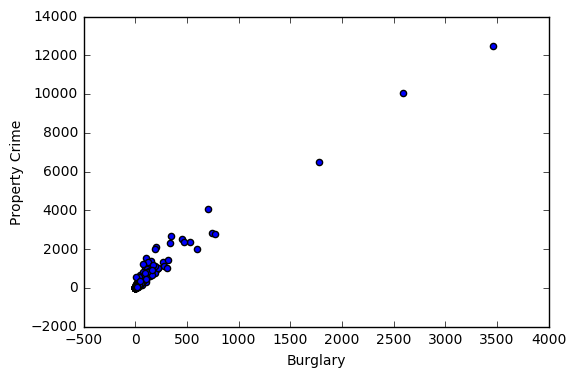

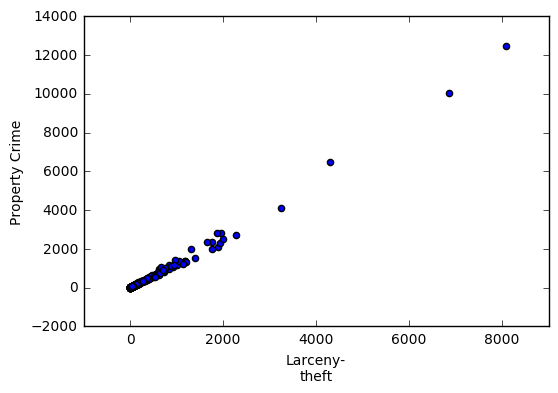

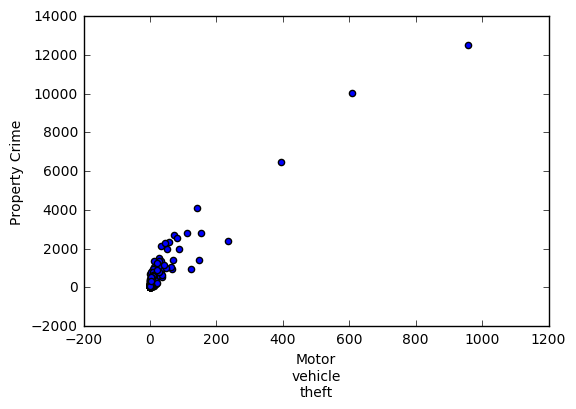

In [135]:
for col in cols:
    plt.scatter(nycrime[col], nycrime['Property\ncrime'])
    plt.xlabel(col)
    plt.ylabel('Property Crime')
    plt.show()

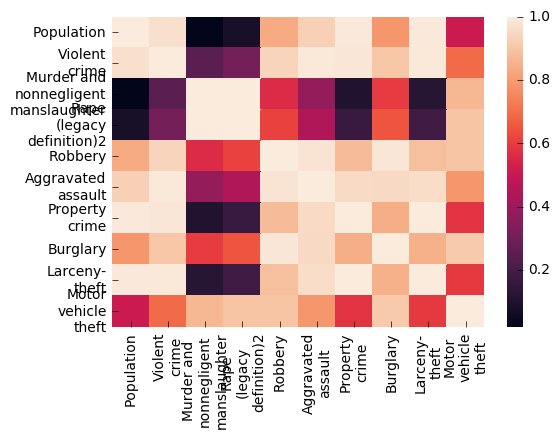

In [119]:
corr = nycrime.corr()
sns.heatmap(corr)

In [136]:
nycrime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft'],
      dtype='object')

In [137]:
X_train, X_test, y_train, y_test = train_test_split(nycrime.drop(['Property\ncrime', 'Murder and\nnonnegligent\nmanslaughter','City', 'Rape\n(legacy\ndefinition)2' ], axis=1), nycrime['Property\ncrime'], test_size=0.3, random_state=0)

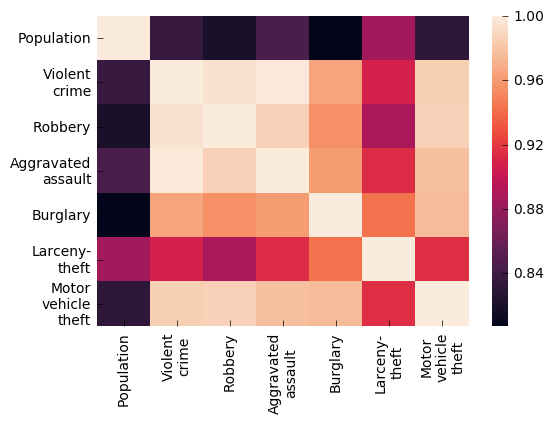

In [141]:
sns.heatmap(X_train.corr())

In [138]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

1.0
1.0
